In [16]:
from util import (
    download_relationship_metrics_csv,
    read_relationship_metrics_csv,
    get_world_data,
    get_agent_data,
    generate_plot_title,
    download_all_maps
)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
simulations = [
    ("S1", "test-700689", "Neutral Personality"),
    ("S2", "test-569b99", "Neutral Personality"),
    ("S3", "test-cce90c", "Solitary Personality"),
    ("S4-a", "test-4052fd", "Neutral Personality"),
    ("S4-b", "test-a35898", "Neutral Personality"),
    ("S4-c", "test-498e08", "Neutral Personality"),
    ("S4-d", "test-c9e625", "Neutral Personality"),
]

sim = 3

test_id = simulations[sim][0]
simulation_id = simulations[sim][1]
personality = simulations[sim][2]
redownload = False

data_dir = os.path.abspath(os.path.join("..", "data", simulation_id))

download_relationship_metrics_csv(simulation_id=simulation_id, redownload=redownload)
download_all_maps(simulation_id=simulation_id, redownload=redownload)
df = read_relationship_metrics_csv(simulation_id=simulation_id)

df.head()

CSV already exists at ../data/test-4052fd/test-4052fd-graph-metrics.csv. Skipping download.
Zip file already exists at ../data/test-4052fd/maps/simulation_test-4052fd_maps.zip. Skipping download.


,tick,average_sentiment,average_normalized_sentiment,density,clustering_coefficient,num_nodes,num_edges,num_components,largest_component_size,average_degree_centrality,num_communities,modularity
0,1,0.000000,0.000000,0.000000,0.0,12,0,12,1,0.000000,12,0.0
1,2,0.000000,0.000000,0.000000,0.0,12,0,12,1,0.000000,0,0.0
2,3,0.419743,0.603422,0.015152,0.0,12,1,11,2,0.015152,11,0.0
3,4,0.386455,0.595429,0.015152,0.0,12,1,11,2,0.015152,11,0.0
4,5,0.320986,0.579565,0.015152,0.0,12,1,11,2,0.015152,11,0.0


In [18]:
df_filtered = pd.concat([
    df.iloc[[0]],
    df.iloc[1:][df.iloc[1:]['average_sentiment'] != 0]
]).copy()
df_filtered['tick'] = range(1, len(df_filtered) + 1)
df_filtered = df_filtered.sort_values('tick').reset_index(drop=True)
df_filtered = df_filtered.iloc[:100].reset_index(drop=True)
df_filtered.head()


,tick,average_sentiment,average_normalized_sentiment,density,clustering_coefficient,num_nodes,num_edges,num_components,largest_component_size,average_degree_centrality,num_communities,modularity
0,1,0.000000,0.000000,0.000000,0.0,12,0,12,1,0.000000,12,0.000000
1,2,0.519976,0.627142,0.015152,0.0,12,1,11,2,0.015152,11,0.000000
2,3,0.589229,0.640647,0.045455,0.0,12,3,9,2,0.045455,9,0.663755
3,4,0.436531,0.607382,0.045455,0.0,12,3,9,2,0.045455,9,0.666568
4,5,0.393277,0.597024,0.045455,0.0,12,3,9,2,0.045455,9,0.666560


In [19]:
world_data = get_world_data(simulation_id)
agent_data = get_agent_data(simulation_id)

In [20]:
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)

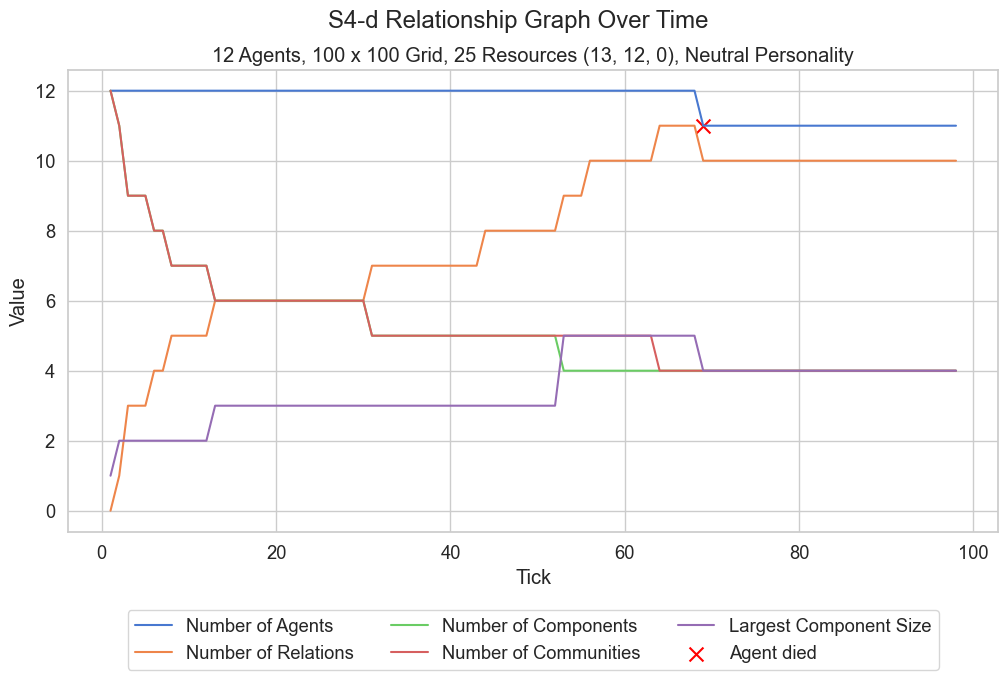

In [21]:
selected_metrics = [
    ("num_nodes", "Number of Agents"),
    ("num_edges", "Number of Relations"),
    ("num_components", "Number of Components"),
    ("num_communities", "Number of Communities"),
    ("largest_component_size", "Largest Component Size"),
]

plt.figure(figsize=(12, 6))
for (metric, label) in selected_metrics:
    sns.lineplot(data=df_filtered, x="tick", y=metric, label=label)

# Find ticks where 'num_nodes' changes, except at the first tick
num_nodes = df_filtered['num_nodes']
change_indices = num_nodes[num_nodes.diff() != 0].index
change_indices = change_indices[change_indices != 0]  # exclude the first tick (index 0)
change_ticks = df_filtered.loc[change_indices, 'tick']
change_values = df_filtered.loc[change_indices, 'num_nodes']

# Mark changes with red 'x'
plt.scatter(change_ticks, change_values, color='red', marker='x', s=100, label='Agent died')

plt.xlabel("Tick")
plt.ylabel("Value")
plt.title(generate_plot_title(world_data, len(agent_data), personality))
plt.suptitle(f"{test_id} Relationship Graph Over Time")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.savefig(
    os.path.join(data_dir, f"{simulation_id}_number_of_x.png"),
    dpi=300,
    bbox_inches="tight",
)


plt.show()

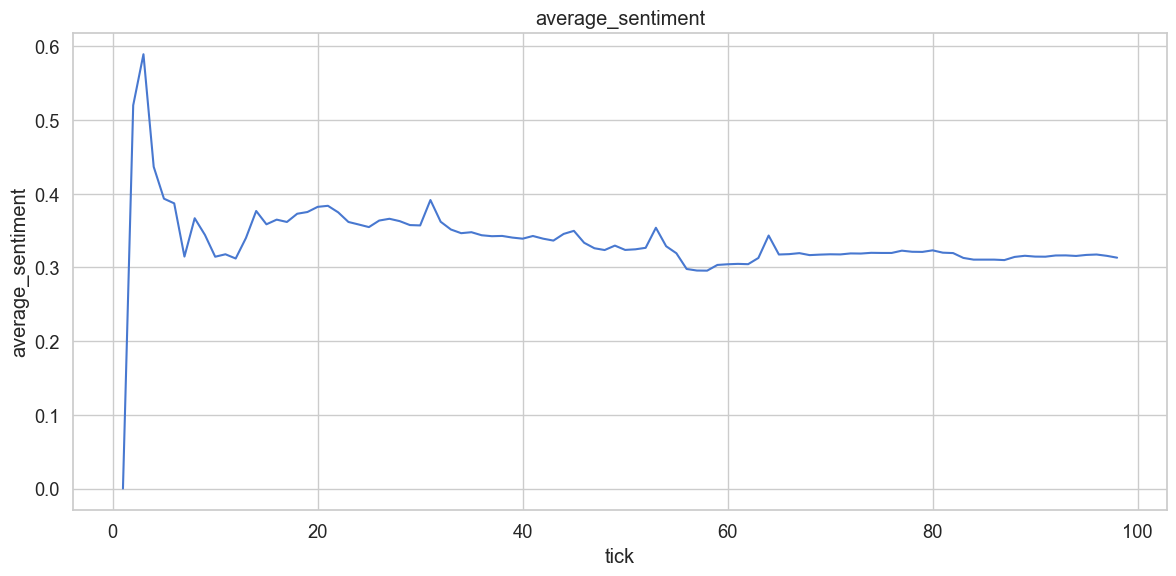

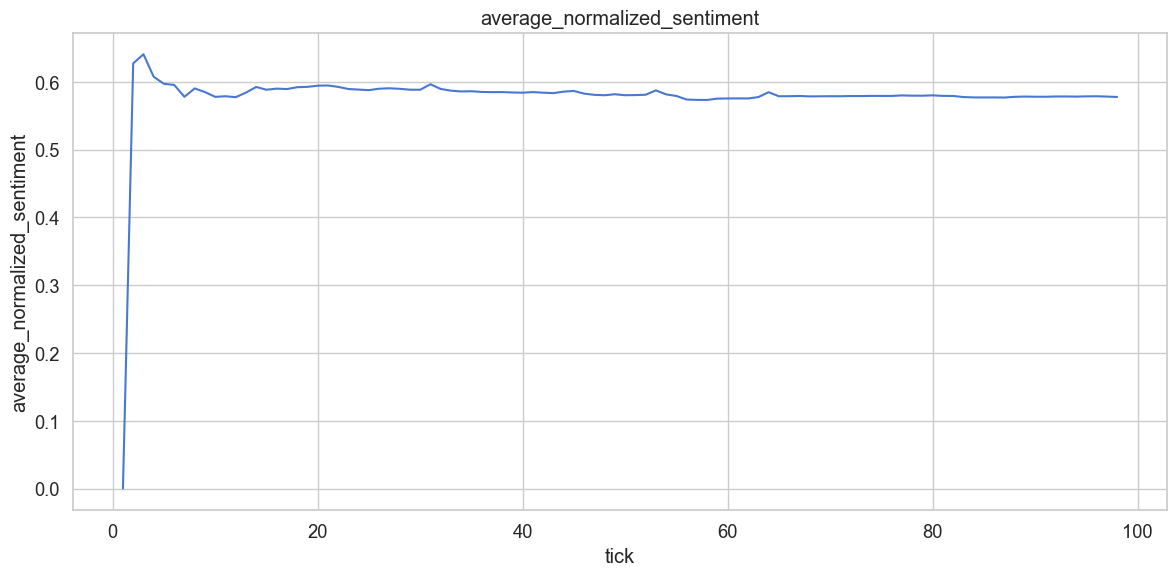

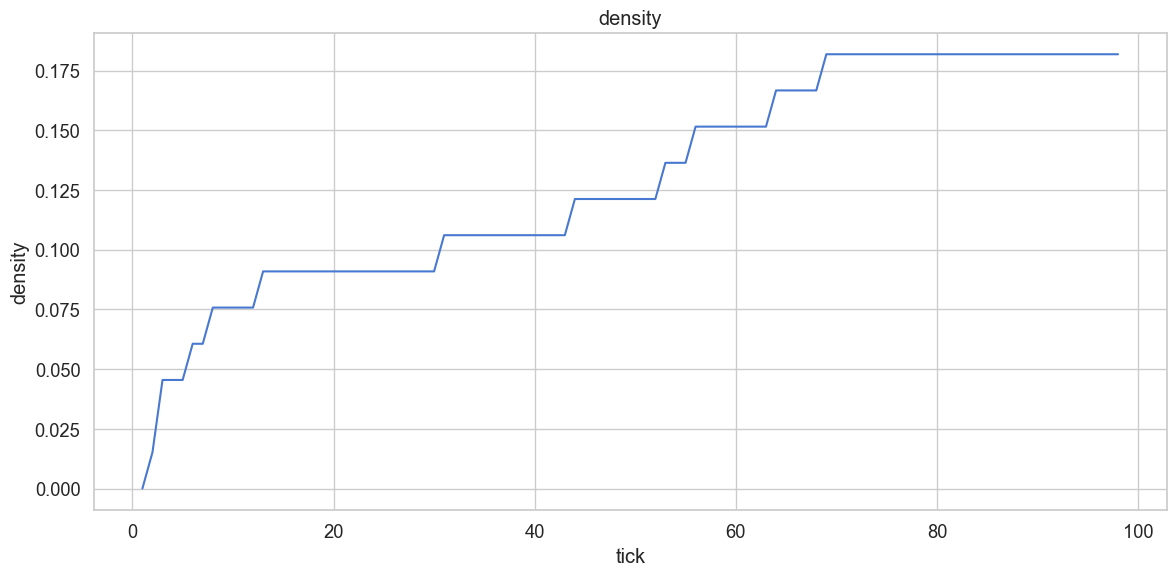

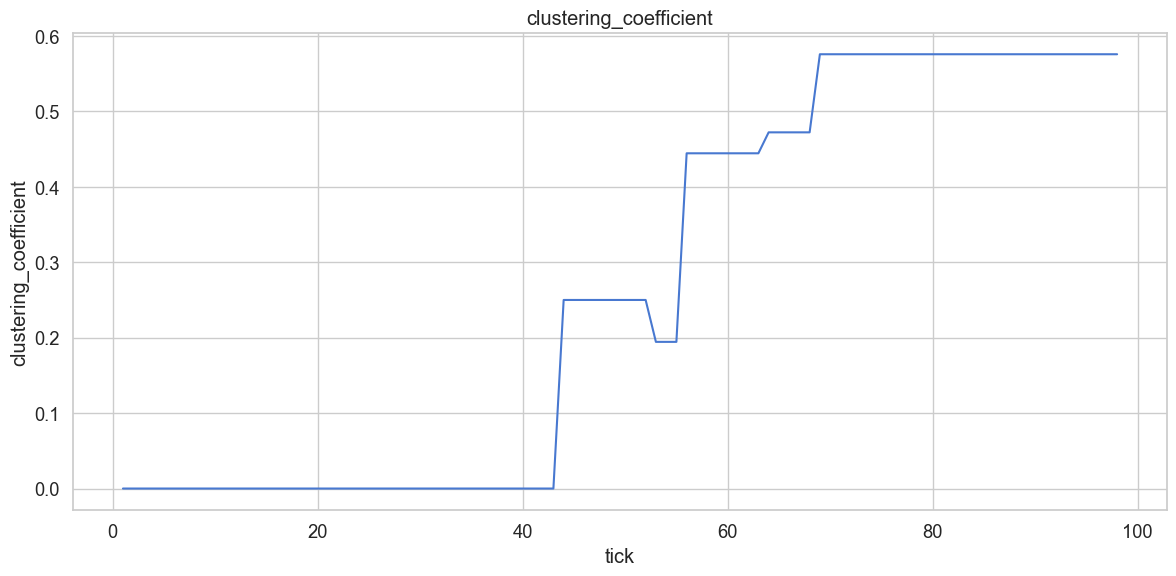

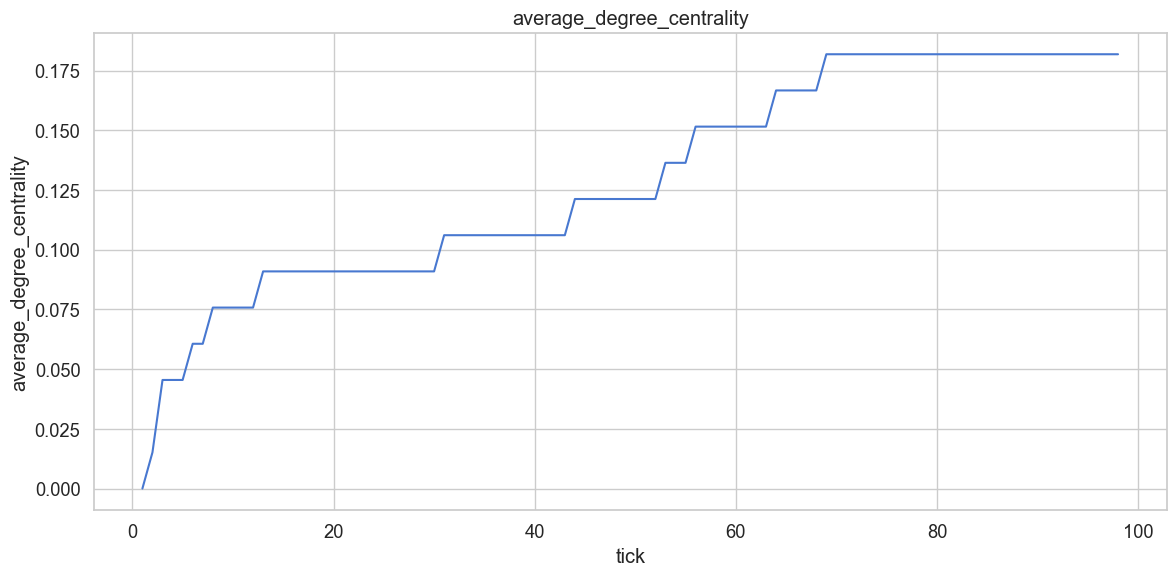

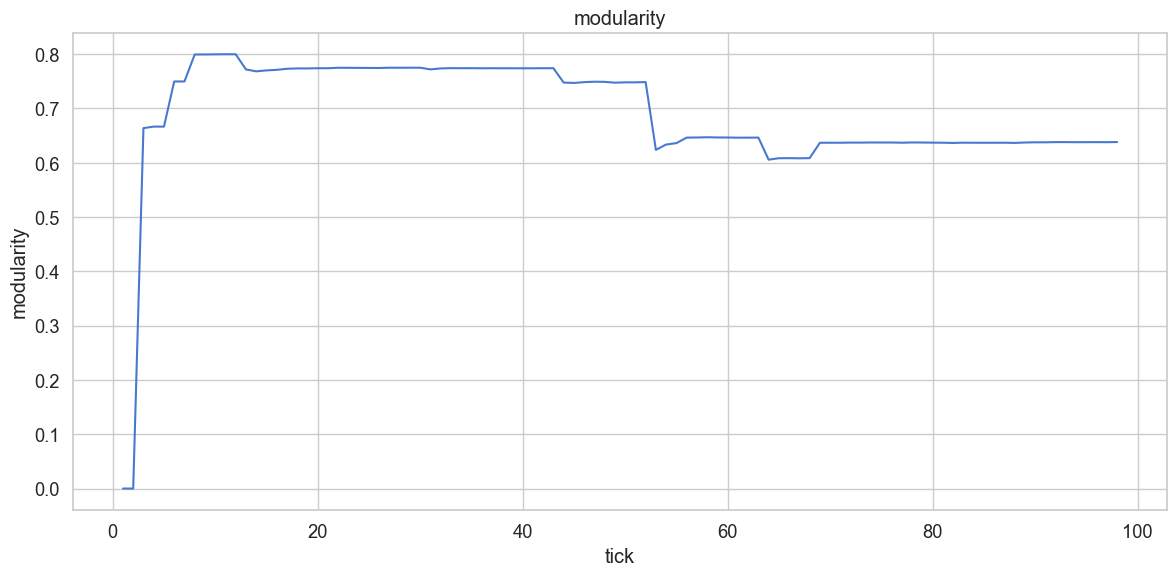

In [22]:
import seaborn as sns

metrics = [col for col in df_filtered.columns if col != "tick"]
selected_metric_names = [m[0] for m in selected_metrics]
other_metrics = [m for m in metrics if m not in selected_metric_names]
for metric in other_metrics:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_filtered, x="tick", y=metric)
    plt.title(metric)
    plt.xlabel("tick")
    plt.ylabel(metric)
    plt.tight_layout()
    plt.savefig(os.path.join(data_dir, f"{simulation_id}_{metric}.png"), dpi=300)

    plt.show()

In [43]:
from util import get_action_logs

all_rows = []
for test_id, simulation_id, personality in simulations:
    action_logs = get_action_logs(simulation_id)
    df_actions = pd.DataFrame(action_logs)
    df_actions = df_actions[df_actions['tick'] <= 100]

    actions = [
        "move",
        "random_move",
        "start_conversation",
        "end_conversation",
        "continue_conversation",
        "accept_conversation_request",
        "decline_conversation_request",
        "harvest_resource",
        "continue_waiting",
        "stop_waiting",
        "harvested_resource_finished",
    ]

    action_counts = {}
    for act in actions:
        mask_action = df_actions['action'].str.contains(act, case=False, na=False)
        mask_no_error = ~df_actions['feedback'].str.contains('error', case=False, na=False)
        action_counts[act] = (mask_action & mask_no_error).sum()
        col_err = f"{act}_error"
        action_counts[col_err] = (mask_action & ~mask_no_error).sum()

    row = {"test_id": test_id, "simulation_id": simulation_id}
    row.update(action_counts)
    all_rows.append(row)

csv_path = os.path.join("../data", "actions.csv")
df_joint = pd.DataFrame(all_rows)
df_joint.to_csv(csv_path, index=False)
df_joint


,test_id,simulation_id,move,move_error,random_move,random_move_error,start_conversation,start_conversation_error,end_conversation,end_conversation_error,...,decline_conversation_request,decline_conversation_request_error,harvest_resource,harvest_resource_error,continue_waiting,continue_waiting_error,stop_waiting,stop_waiting_error,harvested_resource_finished,harvested_resource_finished_error
0,S1,test-700689,289,123,4,5,56,24,56,0,...,2,0,76,34,58,0,47,0,26,0
1,S2,test-569b99,439,145,3,2,53,14,54,0,...,3,0,53,15,12,0,8,0,17,0
2,S3,test-cce90c,519,193,7,10,25,13,9,0,...,16,2,84,25,37,0,44,0,10,0
3,S4-a,test-4052fd,375,122,1,3,58,38,56,0,...,4,1,47,23,28,0,11,0,18,0
4,S4-b,test-a35898,356,137,1,3,50,42,42,1,...,6,0,60,18,45,0,25,0,18,0
5,S4-c,test-498e08,343,148,3,13,36,23,34,0,...,5,0,83,14,50,0,44,0,14,0
6,S4-d,test-c9e625,385,122,1,4,46,37,49,0,...,0,0,69,25,49,0,26,0,21,0


CSV already exists at ../data/test-4052fd/test-4052fd-graph-metrics.csv. Skipping download.
CSV already exists at ../data/test-a35898/test-a35898-graph-metrics.csv. Skipping download.
CSV already exists at ../data/test-498e08/test-498e08-graph-metrics.csv. Skipping download.
CSV already exists at ../data/test-c9e625/test-c9e625-graph-metrics.csv. Skipping download.


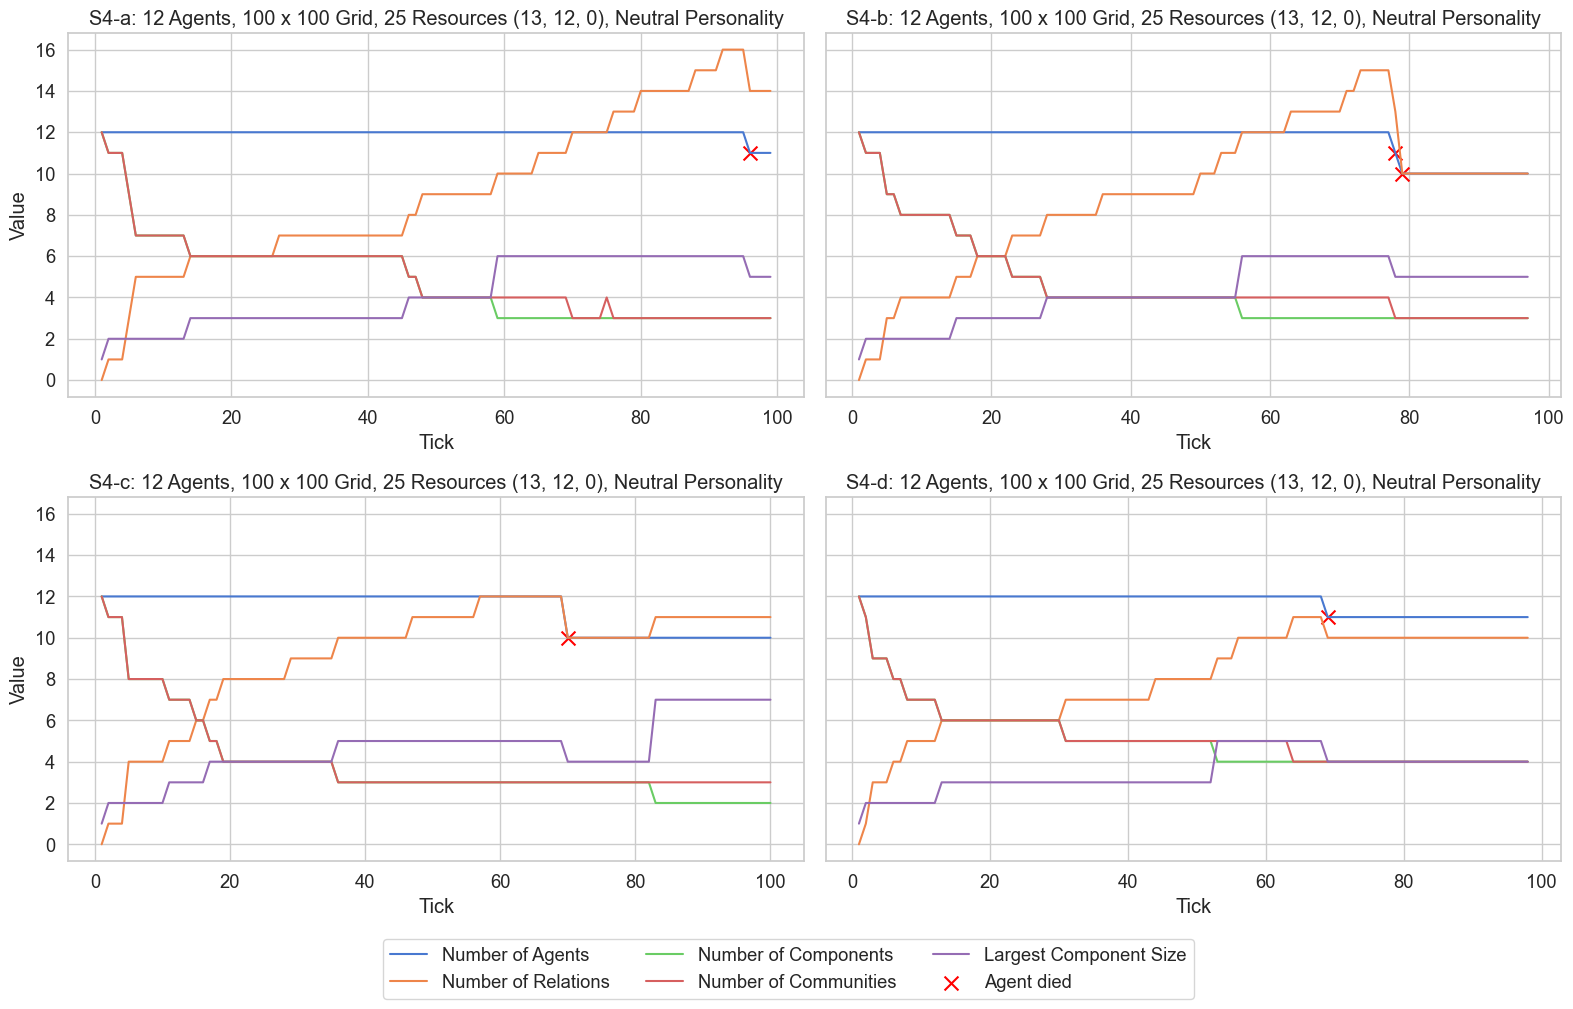

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=True)
axes = axes.flatten()
for i, (test_id, simulation_id, personality) in enumerate(simulations):
    data_dir = os.path.abspath(os.path.join("..", "data", simulation_id))
    download_relationship_metrics_csv(simulation_id=simulation_id, redownload=redownload)
    df = read_relationship_metrics_csv(simulation_id=simulation_id)
    world_data = get_world_data(simulation_id)
    agent_data = get_agent_data(simulation_id)
    df_filtered = pd.concat([
        df.iloc[[0]],
        df.iloc[1:][df.iloc[1:]['average_sentiment'] != 0]
    ]).copy()
    df_filtered['tick'] = range(1, len(df_filtered) + 1)
    df_filtered = df_filtered.sort_values('tick').reset_index(drop=True)
    df_filtered = df_filtered.iloc[:100].reset_index(drop=True)
    world_data = get_world_data(simulation_id)
    agent_data = get_agent_data(simulation_id)
    for metric, label in selected_metrics:
        sns.lineplot(data=df_filtered, x="tick", y=metric, label=label if i == 0 else None, ax=axes[i])
    num_nodes = df_filtered["num_nodes"]
    change_indices = num_nodes[num_nodes.diff() != 0].index
    change_indices = change_indices[change_indices != 0]
    change_ticks = df_filtered.loc[change_indices, "tick"]
    change_values = df_filtered.loc[change_indices, "num_nodes"]
    axes[i].scatter(change_ticks, change_values, color="red", marker="x", s=100, label="Agent died" if i == 0 else None)
    axes[i].set_xlabel("Tick")
    axes[i].set_title(test_id + ": " + generate_plot_title(world_data, len(agent_data), personality))
    if axes[i].get_legend() is not None:
        axes[i].get_legend().remove()

axes[0].set_ylabel("Value")
axes[1].set_ylabel("Value")
axes[2].set_ylabel("Value")

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", bbox_to_anchor=(0.5, -0.02), ncol=3)
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig("../data/relationship_graph.png", dpi=300, bbox_inches="tight")
plt.show()


CSV already exists at ../data/test-700689/test-700689-graph-metrics.csv. Skipping download.
CSV already exists at ../data/test-569b99/test-569b99-graph-metrics.csv. Skipping download.
CSV already exists at ../data/test-cce90c/test-cce90c-graph-metrics.csv. Skipping download.
CSV already exists at ../data/test-4052fd/test-4052fd-graph-metrics.csv. Skipping download.
CSV already exists at ../data/test-a35898/test-a35898-graph-metrics.csv. Skipping download.
CSV already exists at ../data/test-498e08/test-498e08-graph-metrics.csv. Skipping download.
CSV already exists at ../data/test-c9e625/test-c9e625-graph-metrics.csv. Skipping download.


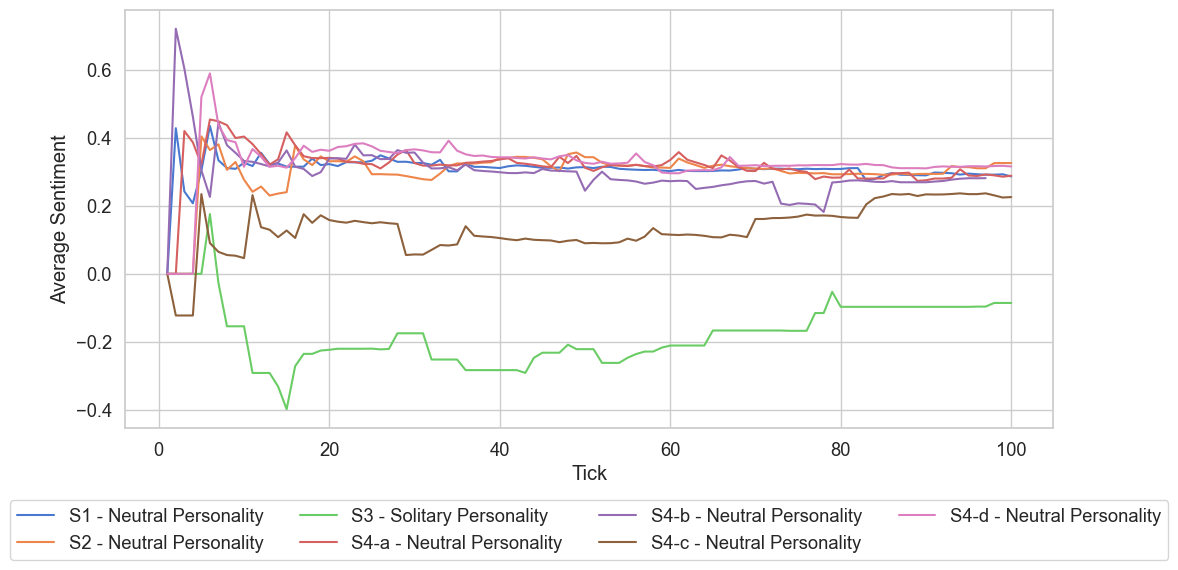

In [38]:
plt.figure(figsize=(12, 6))
for test_id, simulation_id, personality in simulations:
    download_relationship_metrics_csv(
        simulation_id=simulation_id, redownload=False
    )
    df = read_relationship_metrics_csv(simulation_id=simulation_id)
    df["tick"] = range(1, len(df) + 1)
    df = df.sort_values("tick").reset_index(drop=True)
    df = df.iloc[:100].reset_index(drop=True)
    sns.lineplot(
        data=df,
        x="tick",
        y="average_sentiment",
        label=test_id + " - " + personality,
    )

plt.xlabel("Tick")
plt.ylabel("Average Sentiment")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.tight_layout()
plt.savefig(
    "../data/avg_sentiment_all.png", dpi=300, bbox_inches="tight"
)
plt.show()

CSV already exists at ../data/test-700689/test-700689-graph-metrics.csv. Skipping download.
CSV already exists at ../data/test-569b99/test-569b99-graph-metrics.csv. Skipping download.
CSV already exists at ../data/test-cce90c/test-cce90c-graph-metrics.csv. Skipping download.
CSV already exists at ../data/test-4052fd/test-4052fd-graph-metrics.csv. Skipping download.
CSV already exists at ../data/test-a35898/test-a35898-graph-metrics.csv. Skipping download.
CSV already exists at ../data/test-498e08/test-498e08-graph-metrics.csv. Skipping download.
CSV already exists at ../data/test-c9e625/test-c9e625-graph-metrics.csv. Skipping download.


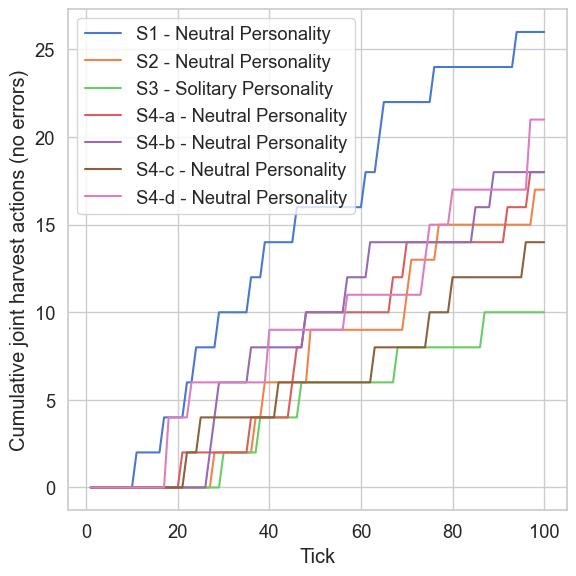

In [39]:
plt.figure(figsize=(6, 6))
for test_id, simulation_id, personality in simulations:
    download_relationship_metrics_csv(
        simulation_id=simulation_id, redownload=False
    )
    df_actions_sim = pd.DataFrame(get_action_logs(simulation_id))
    df_actions_sim = df_actions_sim[df_actions_sim["tick"] <= 100]
    mask_action = df_actions_sim["action"].str.contains(
        "harvested_resource_finished", case=False, na=False
    )
    mask_no_error = ~df_actions_sim["feedback"].str.contains("error", case=False, na=False)
    harvested_counts = (
        df_actions_sim[mask_action & mask_no_error]
        .groupby("tick")
        .size()
        .reindex(range(1, 101), fill_value=0)
        .cumsum()
    )
    plt.plot(
        harvested_counts.index,
        harvested_counts.values,
        label=f"{test_id} - {personality}",
    )

plt.xlabel("Tick")
plt.ylabel("Cumulative joint harvest actions (no errors)")
plt.legend()
plt.tight_layout()
plt.savefig("../data/harvested_together_all.png", dpi=300, bbox_inches="tight")
plt.show()

CSV already exists at ../data/test-700689/test-700689-graph-metrics.csv. Skipping download.
CSV already exists at ../data/test-569b99/test-569b99-graph-metrics.csv. Skipping download.
CSV already exists at ../data/test-cce90c/test-cce90c-graph-metrics.csv. Skipping download.
CSV already exists at ../data/test-4052fd/test-4052fd-graph-metrics.csv. Skipping download.
CSV already exists at ../data/test-a35898/test-a35898-graph-metrics.csv. Skipping download.
CSV already exists at ../data/test-498e08/test-498e08-graph-metrics.csv. Skipping download.
CSV already exists at ../data/test-c9e625/test-c9e625-graph-metrics.csv. Skipping download.


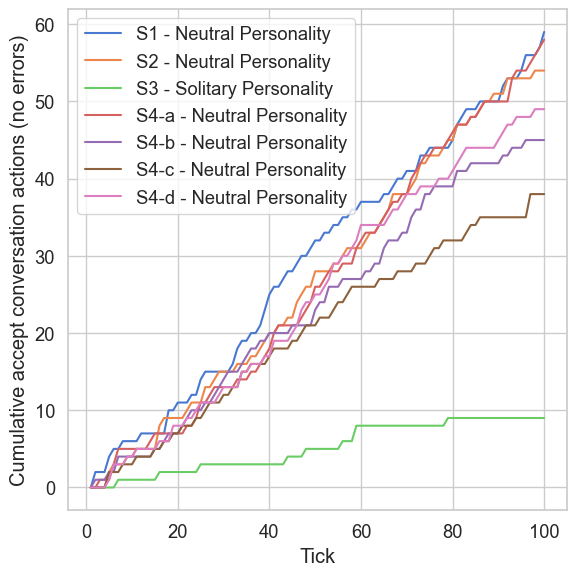

In [40]:
plt.figure(figsize=(6, 6))
for test_id, simulation_id, personality in simulations:
    download_relationship_metrics_csv(
        simulation_id=simulation_id, redownload=False
    )
    df_actions_sim = pd.DataFrame(get_action_logs(simulation_id))
    df_actions_sim = df_actions_sim[df_actions_sim["tick"] <= 100]
    mask_action = df_actions_sim["action"].str.contains(
        "accept_conversation_request", case=False, na=False
    )
    mask_no_error = ~df_actions_sim["feedback"].str.contains("error", case=False, na=False)
    accepted_counts = (
        df_actions_sim[mask_action & mask_no_error]
        .groupby("tick")
        .size()
        .reindex(range(1, 101), fill_value=0)
        .cumsum()
    )
    plt.plot(
        accepted_counts.index,
        accepted_counts.values,
        label=f"{test_id} - {personality}",
    )

plt.xlabel("Tick")
plt.ylabel("Cumulative accept conversation actions (no errors)")
plt.legend()
plt.tight_layout()
plt.savefig("../data/accept_conversation_request_all.png", dpi=300, bbox_inches="tight")
plt.show()

CSV already exists at ../data/test-4052fd/test-4052fd-graph-metrics.csv. Skipping download.
CSV already exists at ../data/test-a35898/test-a35898-graph-metrics.csv. Skipping download.
CSV already exists at ../data/test-498e08/test-498e08-graph-metrics.csv. Skipping download.
CSV already exists at ../data/test-c9e625/test-c9e625-graph-metrics.csv. Skipping download.


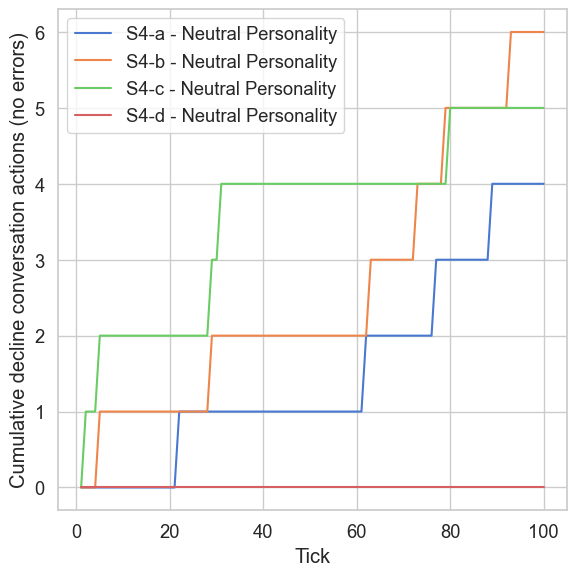

In [28]:
plt.figure(figsize=(6, 6))
for test_id, simulation_id, personality in simulations:
    download_relationship_metrics_csv(
        simulation_id=simulation_id, redownload=False
    )
    df_actions_sim = pd.DataFrame(get_action_logs(simulation_id))
    df_actions_sim = df_actions_sim[df_actions_sim["tick"] <= 100]
    mask_action = df_actions_sim["action"].str.contains(
        "decline_conversation_request", case=False, na=False
    )
    mask_no_error = ~df_actions_sim["feedback"].str.contains("error", case=False, na=False)
    declined_counts = (
        df_actions_sim[mask_action & mask_no_error]
        .groupby("tick")
        .size()
        .reindex(range(1, 101), fill_value=0)
        .cumsum()
    )
    plt.plot(
        declined_counts.index,
        declined_counts.values,
        label=f"{test_id} - {personality}",
    )

plt.xlabel("Tick")
plt.ylabel("Cumulative decline conversation actions (no errors)")
plt.legend()
plt.tight_layout()
plt.savefig("../data/decline_conversation_request_all.png", dpi=300, bbox_inches="tight")
plt.show()

In [45]:
import pandas as pd
import numpy as np

# Raw CSV data
# Read the actual CSV and filter for S4-a to S4-d
df_joint = pd.read_csv(csv_path)
df_joint_s4 = df_joint[df_joint["test_id"].isin(["S4-a", "S4-b", "S4-c", "S4-d"])].reset_index(drop=True)
csv_data = df_joint_s4.to_csv(index=False)

# Load data into a DataFrame
from io import StringIO

df = pd.read_csv(StringIO(csv_data))

# Drop identifiers
df_numeric = df.drop(columns=["test_id", "simulation_id"])

# Compute mean and std deviation
means = df_numeric.mean()
stds = df_numeric.std(ddof=0)  # population standard deviation

# Combine into a new DataFrame
summary_df = pd.DataFrame({"Mean": means, "StdDev": stds})

# Optional: Format as "mean ± std"
summary_df["Formatted"] = summary_df.apply(
    lambda row: f"{row['Mean']:.2f} ± {row['StdDev']:.2f}", axis=1
)

# Show the formatted summary
print(summary_df[["Formatted"]])

                                         Formatted
move                                364.75 ± 16.32
move_error                          132.25 ± 10.96
random_move                            1.50 ± 0.87
random_move_error                      5.75 ± 4.21
start_conversation                    47.50 ± 7.92
start_conversation_error              35.00 ± 7.18
end_conversation                      45.25 ± 8.17
end_conversation_error                 0.25 ± 0.43
continue_conversation                117.00 ± 6.52
continue_conversation_error            0.00 ± 0.00
accept_conversation_request           47.50 ± 7.23
accept_conversation_request_error    18.00 ± 12.85
decline_conversation_request           3.75 ± 2.28
decline_conversation_request_error     0.25 ± 0.43
harvest_resource                     64.75 ± 13.12
harvest_resource_error                20.00 ± 4.30
continue_waiting                      43.00 ± 8.86
continue_waiting_error                 0.00 ± 0.00
stop_waiting                   